# DBTL 0 data analysis

This notebook analyzes OD350 and OD600 data from DBTL cycle 0 of flaviolin producing P. putida.

## Inputs and outputs

#### Required file to run this notebook:
   - edd slug

   - `data/indigoidine/cycle1_batch1_data.csv` - production data


#### File generated by running this notebook:
   
 
    
The files are stored in the user defined directory.

## Setup

Importing needed libraries:

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

## User parameters

In [2]:
CYCLE = 0

user_params = {
    'output_file_path': f'../data/flaviolin/DBTL{CYCLE}', # Folder for output files,
#     'productID': 'CID:160478:Flaviolin',
#     'protocol_name': 'OD350',
    'measurement_file': f'../data/flaviolin/DBTL{CYCLE}/edd_data_OD350.xlsx'
#     'time_point': 48,
    } 

In [3]:
df = pd.read_excel(user_params['measurement_file'], index_col=0)
df.head()

,Measurement Type,Time,Value,Units
Line Name,,,,
C0_WA1_biomek-R1,CID:160478:Flaviolin,48,0.039563,NaN
C0_WB1_biomek-R2,CID:160478:Flaviolin,48,0.073779,NaN
C0_WC1_biomek-R3,CID:160478:Flaviolin,48,0.082351,NaN
C0_WD1_biomek-R4,CID:160478:Flaviolin,48,0.149748,NaN
C0_WE1_biomek-R5,CID:160478:Flaviolin,48,0.204138,NaN


In [19]:
find_well = lambda x: x.name[4:6]
find_row = lambda x: x.name[4]
find_col= lambda x: x.name[5]

In [20]:
# df['Well'] = df.apply(find_well, axis=1)
df['Row'] =  df.apply(find_row, axis=1)
df['Column'] =  df.apply(find_col, axis=1)

In [21]:
df

,Measurement Type,Time,Value,Units,Well,Row,Column
Line Name,,,,,,,
C0_WA1_biomek-R1,CID:160478:Flaviolin,48,0.039563,NaN,A1,A,1
C0_WB1_biomek-R2,CID:160478:Flaviolin,48,0.073779,NaN,B1,B,1
C0_WC1_biomek-R3,CID:160478:Flaviolin,48,0.082351,NaN,C1,C,1
C0_WD1_biomek-R4,CID:160478:Flaviolin,48,0.149748,NaN,D1,D,1
C0_WE1_biomek-R5,CID:160478:Flaviolin,48,0.204138,NaN,E1,E,1
C0_WF1_biomek-R6,CID:160478:Flaviolin,48,0.217884,NaN,F1,F,1
C0_WA2_biomek-R7,CID:160478:Flaviolin,48,-0.018005,NaN,A2,A,2
C0_WB2_biomek-R8,CID:160478:Flaviolin,48,0.040154,NaN,B2,B,2
C0_WC2_biomek-R9,CID:160478:Flaviolin,48,-0.037958,NaN,C2,C,2


In [27]:
data = df.pivot('Row', 'Column')['Value']

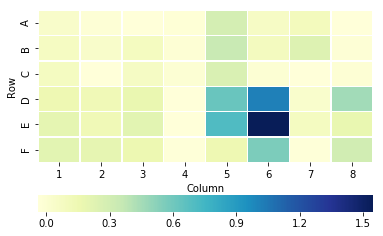

In [40]:
ax = sns.heatmap(data, 
                 linewidths=.5, 
                 cmap="YlGnBu", 
                 cbar_kws={"orientation": "horizontal"},
                )

In [37]:
plt.setp(ax.get_yticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

[None, None, None, None, None, None, None, None, None, None, None, None]